In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Pankaj-Str/codeswithpankaj.com-Machine-Learning/refs/heads/main/Exploratory%20Data%20Analysis%20(EDA)/students.csv")
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school  free/reduced   
1  female        group A                 high school      standard   
2    male        group A                 high school      standard   
3    male        group E          associate's degree      standard   
4    male        group D            some high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed          38             70             98  
1               completed          56             98             71  
2               completed          80             47             58  
3               completed          33             17             51  
4                    none          40             15             46  


In [3]:
print(data.shape)#find row and column numbers

(1000, 8)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# count null values
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


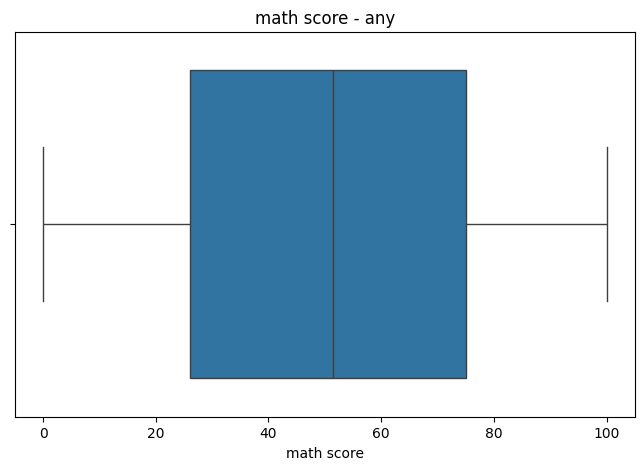

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['math score'])
plt.title("math score - any")
plt.show()

In [7]:
#find the normal range
q1=data['math score'].quantile(0.25)
q2=data['math score'].quantile(0.75)

IQR=q2-q1
data_clean=data[(data['math score']>=q1 - 1.5 *IQR)& (data['maths score']<=q2*IQR)]


KeyError: 'maths score'

skew Data -0.033889641841880695
How much math score


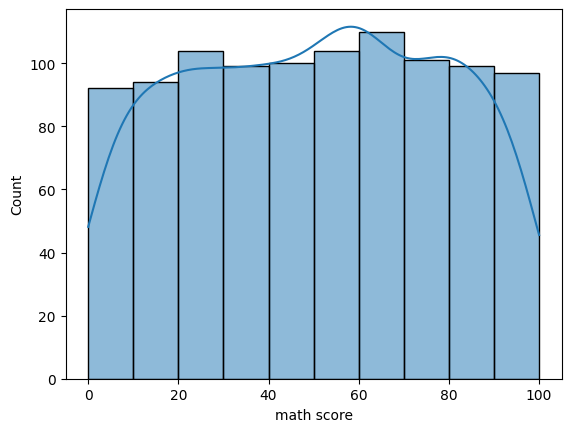

In [11]:

from scipy.stats import skew
print("skew Data",skew(data['math score']))
sns.histplot(data['math score'],bins=10,kde=True)
print("How much math score")
plt.show()

In [14]:
#Date : 19 -March -2025
#Numbers (Encoding)
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.1 MB 5.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.1 MB 5.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 4.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 4.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 4.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 4.8 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 4.9 MB/s eta 0:00:01
   

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['gender_num'] = le.fit_transform(data['gender'])
print("Gender Numbers")
print(data[['gender','gender_num']].head())

Gender Numbers
   gender  gender_num
0    male           1
1  female           0
2    male           1
3    male           1
4    male           1


In [ ]:
data=pd.get_dummies(data,columns=['lunch'],prefix='lunch')     #iterable

In [22]:
#scale Numbers(normalization) (0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['math_score_norm'] = scaler.fit_transform(data[['math score']])
print("math score (0 to 1)")
print(data['math_score_norm'].head())


math score (0 to 1)
0    0.38
1    0.56
2    0.80
3    0.33
4    0.40
Name: math_score_norm, dtype: float64


In [24]:
#standardization (center at 0)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['math_score_std'] = scaler.fit_transform(data[['math score']])
print("math score standardization")
print(data['math_score_std'].head())

math score standardization
0   -0.430777
1    0.205526
2    1.053930
3   -0.607528
4   -0.360077
Name: math_score_std, dtype: float64


In [28]:
#New features 
data['average_score'] = (data['math score'] + data['reading score'])/2
print(" avg score")
print(data['average_score'].head())

 avg score
0    54.0
1    77.0
2    63.5
3    25.0
4    27.5
Name: average_score, dtype: float64


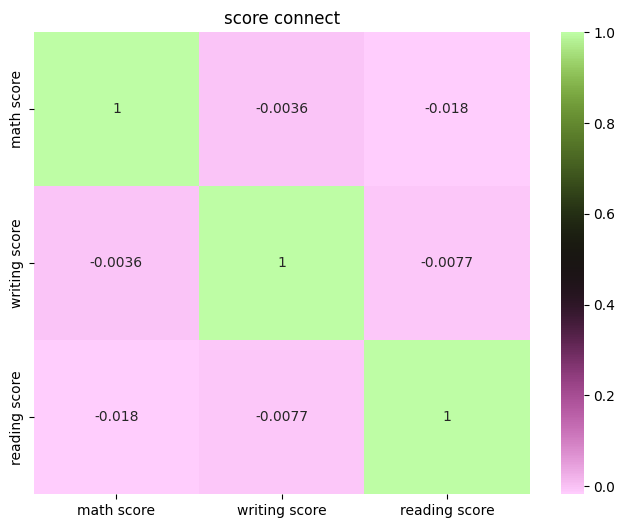

In [42]:
#find connection

corr1 = data[['math score','writing score','reading score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True,cmap='vanimo')
plt.title("score connect")
plt.show()

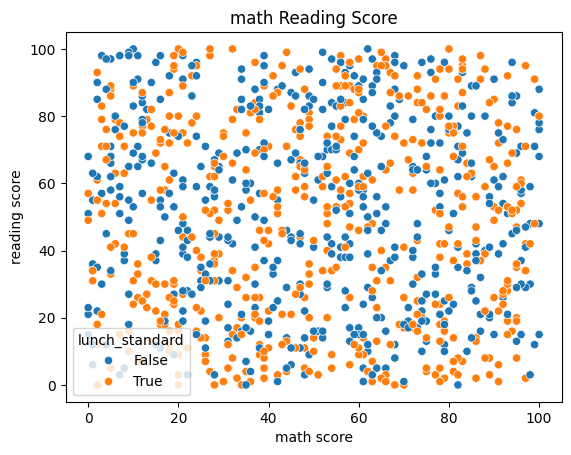

In [48]:
#scatter plot

plt.Figure(figsize=(8,6))
sns.scatterplot(x='math score',y='reading score',hue='lunch_standard',data=data)
plt.title("math Reading Score")
plt.show()